<pre>
                    -------------------------------------------------------------------------

                                       COMPREHENSIVE EXAM ARTIFACT


                                       Author: Yao Gahounzo
                                               Computing PhD 
                                               Computational Math, Science and Engineering
                                               Boise State University

                                       Date: September 29, 2021

                    -------------------------------------------------------------------------- 


This program call the modules Module_ice_ocean and Inputs. The Inputs module contains exact solution, domain
and some other functions. The different solvers are call from the Module_ice_ocean.

The program contains two test cases: 'unit' or 'ice-ocean'.
To switch from unit test to ice-ocean, you have to change: test_case = 'unit' or 'ice-ocean'

In the case of unit test, one need to choose the problem boundary conditions (BCs), namely Dirichlet, 
Neumann, and Robin. So problem with

Dirichlet BC is: icase = 1 
Neumann BC is: icase = 2 
Robin BC is: icase = 3 



Order           : contains the list of the polynomial order used in the numerical integration 
N_element       : contains the number of elements in the domain
time_method     : time integration method 
ti_method       : stages of the time integration method (implicit Runge Kutta method) 
icase           : select the time of the boundary conditions you want to test 
method_type     : continous galerkin (cg) method, it is the only one implemented in Module_ice_ocean 
integration_type: exact or inexact integration 
text_case       : select either we are in unit test case or the ice-ocean simulation 



We refer to the [README](https://github.com/yao24/ComprehensiveExam/blob/main/README.md) file for more details on the 'unit' and 'ice-ocean' test cases, and the equations solved in this program.

In [1]:
# import some built-in module
%matplotlib notebook
%pylab

# import module that contains the functions and solver
from Module_ice_ocean import*

# import Inputs module
from Inputs import*




# Initialization

ti_method = 3                 # Stages of IRK methods
time_method = "BDF3"          # IRK = implicit RK method, BDF2 or BDF3 (ice-ocean: IRK or BDF3)
integration_type = 1          # % = 1 is inexact and = 2 is exact
method_type = 'cg'            # Only CG method in the module (Module_ice_ocean)
icase = 1                     # equation with: 1 = Dirichlet BC, 2 = Neumann BC, 3 = Robin BC

test_case = 'ice-ocean'       # unit: ideal test case for convergence studies
                              # ice-ocean: for ice ocean simulation

order = array([1,2,3,4])            # polynomial order
N_element = array([8,16,32,64])     # Number of elements
Nv = N_element

TW = array([0.3,2.3,5.4])           # Different ambient temperature of the sea-water

if(test_case == 'unit'):
    
    Tf = 0.5                    # Choose the time you want to run the program for here
    
elif(test_case == 'ice-ocean'):
    
    Tf = 42                     # Choose the time you want to run the program for here

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the data from the thermal picture in Gayen et al. (2016) 

# Data for far-field temperature (Tw) equal to 0.3
data03 = loadtxt('tempData03_1.csv',delimiter=',')
x03 = data03[:,0]
y03 = data03[:,1]

# Data for far-field temperature (Tw) equal to 2.3
data203 = loadtxt('tempData203.csv',delimiter=',')
x203 = data203[:,0]
y203 = data203[:,1]

# Data for far-field temperature (Tw) equal to 5.4
data504 = loadtxt('tempData504_1.csv',delimiter=',')
x504 = data504[:,0]
y504 = data504[:,1]

# Array of that contains the data for ploting purpose
X_gayen = [x03,x203,x504]
Y_gayen = [y03,y203,y504]

N = 2, nel = 256, Np = 513
	dt = 1.0000e-02
	Number of time steps = 4200
	walltime = 4.870847e-01


<IPython.core.display.Javascript object>


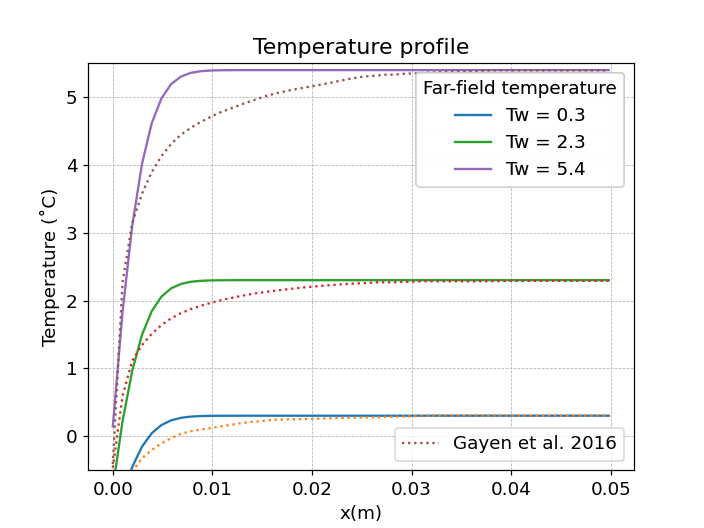

<IPython.core.display.Javascript object>


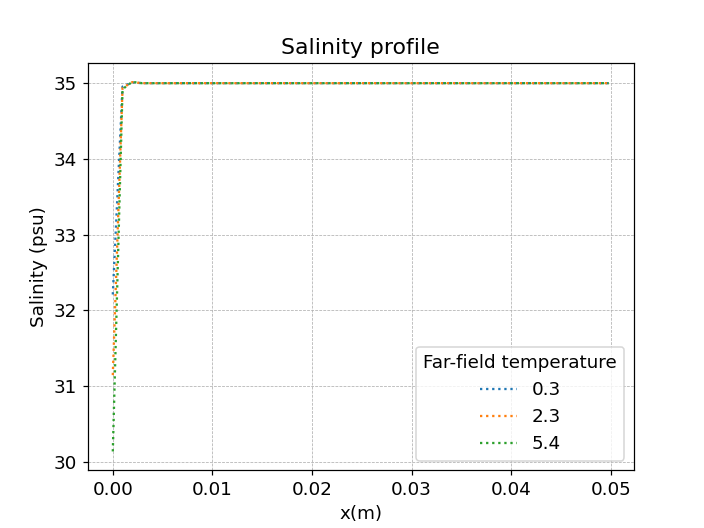

N = 2, nel = 256, Np = 513
	dt = 1.0000e-02
	Number of time steps = 4200
	walltime = 4.655887e-01
N = 2, nel = 256, Np = 513
	dt = 1.0000e-02
	Number of time steps = 4200
	walltime = 4.572743e-01


In [3]:
'''
Visualisation:

    * For the unit test case, we visualize both solutions, exact and numerical. 
      There's also a plot for the convergence studies for different polynomial orders.
    
    * For the ice-ocean case, we visualize the temperature and salinity profiles corresponding to 
      three ambient temperatures of the sea-water.

'''

# Call of the Visualisation function from the Inputs module
Visualisation(order,Nv,test_case,ti_method,time_method,integration_type,method_type,icase,TW,X_gayen,Y_gayen,Tf)

<IPython.core.display.Javascript object>


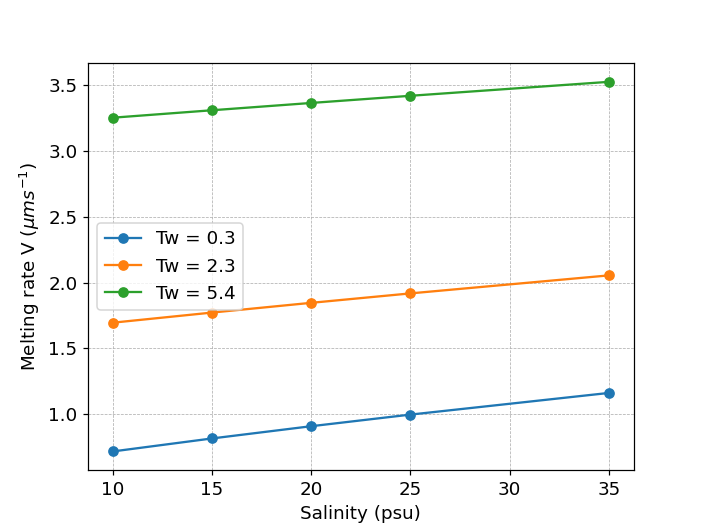

<IPython.core.display.Javascript object>


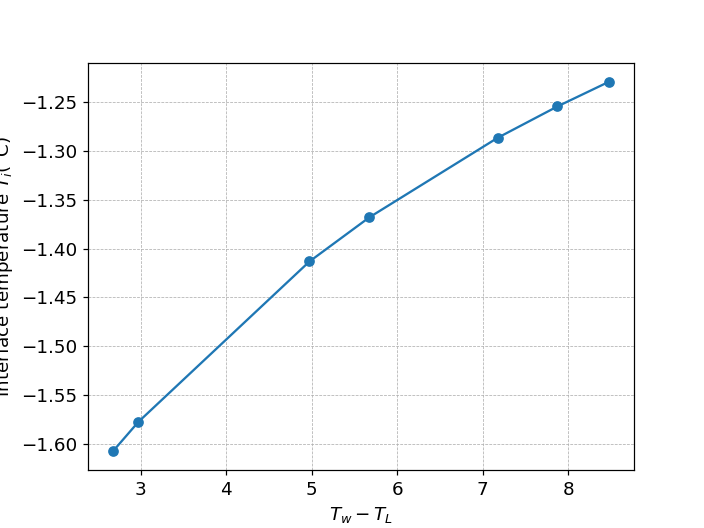

In [4]:
'''
    * Plot the melt rate at fixed ambient temperature as the salinity vary.

    * Plot the interface temperature for different values of the ambient temperature
'''

if(test_case == 'ice-ocean'):
    
    SW = array([10,15,20,25,35])
    
    # Call the Visual_interface from Inputs module
    Visual_interface(SW, TW)